<a href="https://colab.research.google.com/github/abhi9716/notebooks/blob/master/KL_Divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KL Divergence

KL Divergence is a measure of how one probability distribution diverges from a second expected probability distribution. So, if the value of divergence is really small, then they are very close. If the number is high, then they are far apart.

In [0]:
#import library
import pandas as pd
import numpy as np

FOR DISCRETE DISTRIBUTIONS

In [0]:
#lets define data
data1 = [[4-4.5,"a", 1], [4.5-5,"b", 3], [5-5.5,"c", 8],  [5.5-6,"d", 8]]
data2 = [[4-4.5,"a", 2], [4.5-5,"b", 5], [5-5.5,"c", 7],  [5.5-6,"d", 6]]
data3 = [[4-4.5,"a", 1], [4.5-5,"b", 2], [5-5.5,"c", 6],  [5.5-6,"d", 11]]
class_A=pd.DataFrame(data1,columns = ['height','range', 'no_of_students'])
class_B=pd.DataFrame(data2,columns = ['height','range', 'no_of_students'])
class_C=pd.DataFrame(data3,columns = ['height','range', 'no_of_students'])

In [0]:
def KL_Divergence(dt1,dt2):
    
    # Kullback-Leibler divergence D(p || q) for discrete distributions
    
    p=[x/np.sum(dt1.values) for x in dt1.values]
    q=[x/np.sum(dt2.values) for x in dt2.values]
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    
    return np.sum(np.where(q != 0, p * np.log(p / q), 0))


In [0]:
KL_Divergence(class_A.no_of_students,class_B.no_of_students)

0.05720418343762566

In [0]:
#compare our function with scipy KL_Divergence
from scipy import stats

p=[x/np.sum(class_A.no_of_students.values) for x in class_A.no_of_students.values]
q=[x/np.sum(class_B.no_of_students.values) for x in class_B.no_of_students.values]

stats.entropy(pk=p, qk=q)

0.05720418343762566

In [0]:
#compare two discrete distributions 
D_KL1=KL_Divergence(class_A.no_of_students,class_B.no_of_students)
D_KL2=KL_Divergence(class_A.no_of_students,class_C.no_of_students)

#since D_KL1 > D_KL2 A is more closer to C as compared to B

(D_KL1,D_KL2)

(0.05720418343762566, 0.04851110274952322)

FOR CONTINUOUS DISTRIBUTIONS

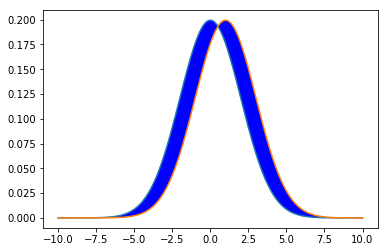

In [0]:

# KL Divergence computes the shaded area shown below.

import matplotlib.pyplot as plt
x_axis = np.arange(-10, 10, 0.001)
# Mean = 0, SD = 2.
dist_a = stats.norm.pdf(x_axis,0,2)
# Mean = 1, SD = 2
dist_b = stats.norm.pdf(x_axis,1,2)

plt.plot(x_axis, dist_a)
plt.plot(x_axis, dist_b)
plt.fill_between(x_axis, dist_a, dist_b, facecolor='green', interpolate=True)
plt.fill_between(x_axis, dist_a, dist_b, facecolor='blue', interpolate=True)
plt.show()

In [0]:
#lets define data
# A=[mean,standard_deviation]
A=[4,2.1]
B=[4.2,3.1]
C=[5.2,2]

In [0]:

def gaussian_divergence(l1,l2):
    # KL-divergence of two Gaussians.
    
    mu1=l1[0]
    mu2=l2[0]
    sig1=l1[1]
    sig2=l2[1]
    
    sigdiff = sig2*sig2 - sig1*sig1
    sigprod = (pow((sig1*sig2),2))
    lograt  = np.log(sig2/sig1)
    
    return lograt + ((sigdiff)*(mu2*mu2+sig2*sig2) / (2*sigprod))-((mu1*sig2*sig2-mu2*sig1*sig1)*mu2/(pow(sig1*sig2,2)))+(mu1*mu1*sig2*sig2-mu2*mu2*sig1*sig1)/(2*sigprod)

In [0]:
gaussian_divergence(A,B)

0.9835690751517457

In [0]:
#compare two continuous distributions 
D_KL1=gaussian_divergence(A,B)
D_KL2=gaussian_divergence(A,C)

#since D_KL1 > D_KL2 A is more closer to C as compared to B

(D_KL1,D_KL2)

(0.9835690751517457, 0.06798988118204297)